# Introducción al Machine Learning

NOTA: realizo las prácticas en Notebook y no en Python, porque esto me permite agregar, por ejemplo, imágenes que den un mejor soporte visual a distintos conceptos, además de permitir la realización de gráficos (que serán muy necesarios en sesiones futuras). Además, tuve inconvenientes al intentar ejecutar estos programas en Python (sobre todo con la lectura de archivos, tenía que agregar ciertas instrucciones para poder generar los 'path' y se complejizaba al cuete)

## Definición
El funcionamiento básico del Machine Learning se basa fundamentalmente en **encontrar patrones** en eventos/datos del pasado que te ayudarán a **tomar una decisión** en el futuro.
Por ejemplo, predecir el valor de una casa, habiendo analizado y encontrado patrones sobre una colección previa de casas.

## Decision Tree
Este es el modelo más básico. Se basa en establecer una pregunta y, según la respuesta, concluir en una u otra predicción.

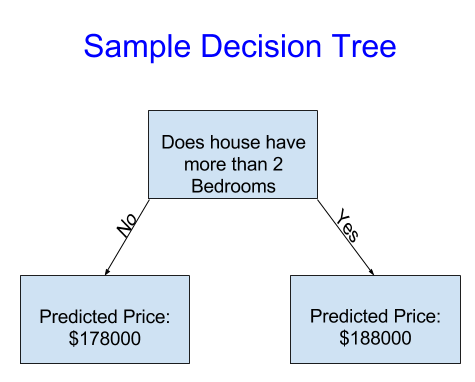

Utilizamos, entonces, la data para dividir las casas en grupos y, luego, para predecir el precio (utiliza el 'average' de los precios para las casas de esa característica). Este proceso se denomina **fitting o training** y la data utilizada para ello, **training data**.

### Mejora al Decision Tree
Este modelo básico puede mejorarse, por ejemplo, incorporando más *splits*, esto es más factores que influyan a la toma de decisión (arbol más profundo)


#### imagen no esta cargando
Cada predicción del precio que surge, se denomina **leaf**.

## Explorar data
El primer paso a la hora de crear un modelo de Machine Learning es familiarizarse con los datos. Para ello, utilizaremos una librería denominada **Pandas**.
La pieza fundamental de esta es lo que se conoce como **DataFrame**, el cual puede interpretarse como una **tabla**.

A continuación, podemos observar un ejemplo básico de **carga de datos desde un archivo 'csv' en un DataFrame**.
Luego, el método **describe()** nos permite obtener **valores característicos de nuestro set de datos** (y así realizar una primera interpretación de los datos) como:
- count
- mean
- min
- max



In [12]:
import pandas as pd

# cargo el csv con los datos en un Dataframe
iowa_file_path = 'assets/input/iowa_train_data.csv'
home_data = pd.read_csv(iowa_file_path)

# imprimo valores caracteristicos -> interpretar datos
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Ejemplo de cuestiones a analizar

Observando la data, vemos que la casa mas nueva tiene 12 años de antiguedad. Esto podria tener 2 explicaciones:
1. No se han construido casas desde entonces en dicha zona
2. Los datos fueron recolectados hace mucho, y las casas mas nuevas no apareceran

Entonces, si la razon fuera la numero 2 **¿esto afectaria la calidad de mis predicciones futuras?**